<a href="https://colab.research.google.com/github/kunalburgul/MLDS_Learning/blob/master/Deep_Learning/Perceptron_as_BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Perceptron as a Binary Classifier**

In this section, we shall see how a perceptron solves a linear classification problem.


In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt 
import numpy as np
%matplotlib inline

In [2]:
# Generate dataset
X, Y = make_blobs(n_features = 2, centers = 2, n_samples = 1000, random_state = 12)

In [3]:
X.shape, Y.shape

((1000, 2), (1000,))

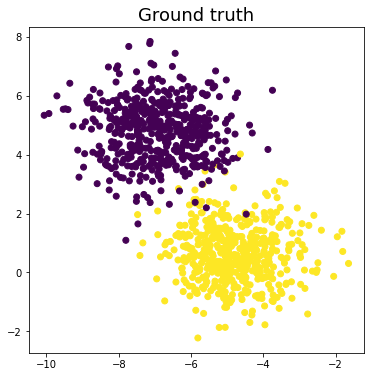

In [4]:
# Visualize dataset
plt.figure(figsize = (6, 6))
plt.scatter(X[:, 0], X[:, 1], c = Y)
plt.title('Ground truth', fontsize = 18)
plt.show()

Let’s say the blue dots are 1s and the green dots are 0s. Using perceptron logic, we can create a decision boundary(hyperplane) for classification which separates different data points on the graph.

In [5]:
# Add a bias to the input vector
X_bias = np.ones([X.shape[0], 3])
X_bias[:, 1:3] = X

Here each row of the above dataset represents the input vector (a datapoint). In order to create a decision boundary, we need to find out the appropriate weights. The weights are  ‘learned’ from the training using the below rule –

In [6]:
# initialize weights with random values
w = np.random.rand(3, 1)
print(w)

[[0.01402688]
 [0.68074052]
 [0.09490268]]


In [7]:
def activation_func(z):
    if z >= 1:
        return 1
    else:
        return 0

In [8]:
for _ in range(100):
     for i in range(X_bias.shape[0]):
         y = activation_func(w.transpose().dot(X_bias[i, :]))
         # Update weights
         w = w + ((Y[i] - y) * X_bias[i, :]).reshape(w.shape[0], 1)

In [9]:
# predicting the class of the datapoints
result_class = [activation_func(w.transpose().dot(x)) for x in X_bias]

In [10]:
# convert to unit vector
w = w/np.sqrt(w.transpose().dot(w))

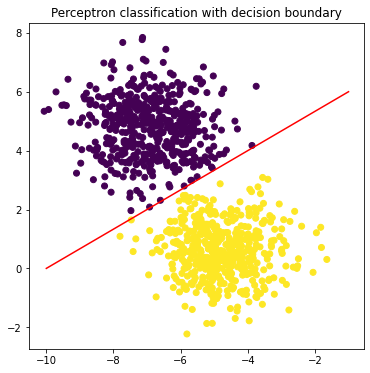

In [11]:
# Visualize results
plt.figure(figsize = (6, 6))
plt.scatter(X[:, 0], X[:, 1], c = result_class)
plt.plot([-10, -1],[0, 6], c ='red')
# plt.plot([-10, -1], hyperplane([-10, -1], w), lw = 3, c = 'red')
plt.title('Perceptron classification with decision boundary')
plt.show()